In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [36]:
test_data = pd.read_csv('data-sets/test.csv')
train_data = pd.read_csv('data-sets/train.csv')

print(train_data)
#test_data.head()
#train_data.head()
#print(test_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [37]:
cm = sns.light_palette("green", as_cmap=True)
corr = train_data.corr()
corr.style.set_caption('Colormaps, with a caption.').background_gradient(cmap=cm)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


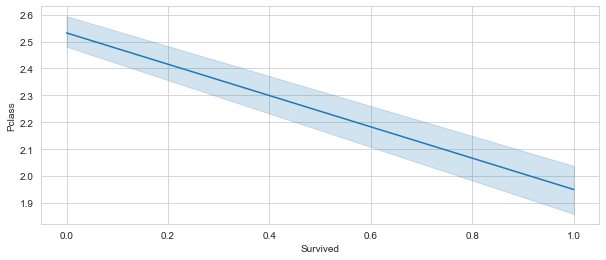

In [99]:
plt.figure(figsize=(10,4))
sns.lineplot(train_data.Survived, train_data.Pclass)

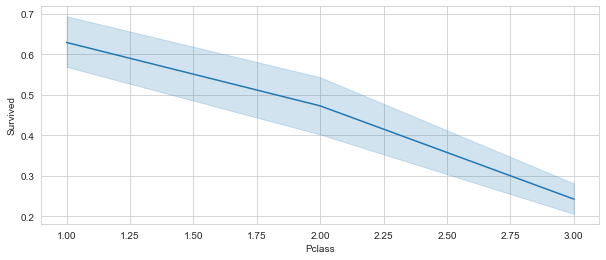

In [100]:
plt.figure(figsize=(10,4))
sns.set_style("whitegrid")
sns.lineplot(train_data.Pclass, train_data.Survived)

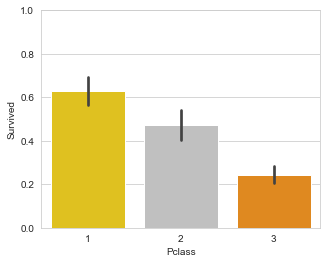

In [106]:
plt.figure(figsize=(5,4))
plt.ylim(0.0, 1.0)
plt.xlim(1, 3)
sns.set_style("whitegrid")
sns.barplot(train_data.Pclass, train_data.Survived, palette=["gold", "silver", "darkorange"])
#sns.lineplot(train_data.Pclass, train_data.Survived)

In [102]:
plt.figure(figsize=(10,4))
sns.barplot(train_data.gender, train_data.Survived)

AttributeError: 'DataFrame' object has no attribute 'gender'

<Figure size 720x288 with 0 Axes>